In [22]:
#Import modules
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot
from datetime import datetime, date, timedelta
from matplotlib.pyplot import figure  
import numpy as np
import math

- FEATURES
    * Time at stop
    * Day of the week
    * Forsinkelse
    * Passengers on/off (passasjerer ombord)
    * Område
- FEATURE ENGINEERING
    * Average time at the stop per område
    * Average passengers per område
    * Forsinkelse per day of the week
    * Time at the stop per day of the week
    * Passenger per time

In [23]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment1/Ruter_data.csv'

In [24]:
df = pd.read_csv(url, sep=';')
#df.head(5)

In [25]:
####Converts str to time, replace hours over 24 with hours under 24
#### changeDate is set to True, the date change with the change of time (use it for first run only)
####Converts str to time, replace hours over 24 with hours under 24
#### changeDate is set to True, the date change with the change of time (use it for first run only)
def strToTime(rowName, changeDate=False):
    x=rowName                               #Name of the row evaluated
    for i, row in df.iterrows():            #df.iterrows() is the buildt in iter from pandas, haven't read documentation, too tierd right now
        hourStr = row[x][:2]
        try:                                #Convert string to int. If value error (ie not a number)
            hourInt = int(hourStr)
        except ValueError:
            df.drop(i, inplace=True)        #Remove the item from the list
        except:
            print("error")                  #For debugging only
            
        if hourInt>23:                                   ##Checks if %H is < 23            
            try:              
                hourInt = hourInt - 24                      #And subtracts 24h
                hourStr = str("%02d" % hourInt) + ":"       #Formats to 2-digit format
                df.at[i,x] = hourStr+row[x][3:]             #Inserts back into string
                
                if changeDate:
                    df.at[i,"Dato"]=row["Dato"] +  timedelta(days=1) #Adds one day to date where time has changed above             

            except:                                #Error msg if it fails!
                print("Error on converting:")
                print(df.iloc[i])

    
    df[x] = pd.to_datetime(df[x],format= '%H:%M:%S' ).dt.time  #Change from string to date time object
  # df[x] = pd.to_datetime(df['Date'] + " " +df[x])
    print("done with " + x)                                       #The loop take some time, so just provideing som feedback


In [26]:
df['Dato'] = pd.to_datetime(df['Dato'])                #Convert date to a datetime object
strToTime('Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', changeDate = True)  #Convert time to a datetime object, change date when time is over 24:00:00
strToTime('Tidspunkt_Faktisk_Avgang_Holdeplass_Fra')         #Change time to datetime, no need for future date change
strToTime('Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra')
strToTime('Tidspunkt_Planlagt_Avgang_Holdeplass_Fra')

done with Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra
done with Tidspunkt_Faktisk_Avgang_Holdeplass_Fra
done with Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra
done with Tidspunkt_Planlagt_Avgang_Holdeplass_Fra


In [27]:
#Rename cells to shorter / more precise names
df = df.rename(columns={"Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra":"Faktisk_Ankomst", "Tidspunkt_Faktisk_Avgang_Holdeplass_Fra":"Faktisk_Avgang", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra":"Planlagt_Ankomst", "Tidspunkt_Planlagt_Avgang_Holdeplass_Fra":"Planlagt_Avgang", "Passasjerer_Ombord":"Passasjerer_Flux"})

In [28]:
#df.iloc[245]
#df.head(5)


In [29]:
#df.info()

## Feature 1: time spent at the stop

In [30]:
print("FEATURE 1: time spent at the stop")
df['Time_At_Stop'] = df.apply(lambda row: datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Avgang) - datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Ankomst), axis = 1)
#Subtract Faktisk Avgang with Faktisk Ankomst to find time spent at the stop. (Datetime(1,1,1,0,0,0) is a dummy placeholder to be able to subtract.)

FEATURE 1: time spent at the stop


In [31]:
#df.head()

## Feature 2: Weekday

In [32]:
df['Ukedag'] = df['Dato'].dt.day_name()

## FEATURE 3: arrival delay

In [33]:
print("FEATURE 3: arrival delay")
df['Forsinkelse'] = df.apply(lambda row: datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Ankomst) - datetime.combine(datetime(1,1,1,0,0,0), row.Planlagt_Ankomst), axis = 1)
#df.iloc[245]
# Subtract Faktisk Avgang with Planlagt Avgang to find the delay/anticipation in departure. (Datetime(1,1,1,0,0,0) is a dummy placeholder to be able to subtract.)

FEATURE 3: arrival delay


## Feature 4 and 5: Are already in the data set as
- Passasjerer_Flux
- Område

In [34]:
#Moved to feature 5
# figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
# plot.plot(df['Ukedag'], df['Time_At_Stop'], 'o')                      #Plotting Stoptime with date, 'o' - gives scatter plot
# plot.xticks(rotation='vertical')
# plot.title('Stop Time Based on day of the week')


# FEATURE ENGINEERING 4: Forsinkelse per day of the week

In [35]:
#df[df['Forsinkelse']==df['Forsinkelse'].max()]

Text(0.5, 1.0, 'Forsinkelse')

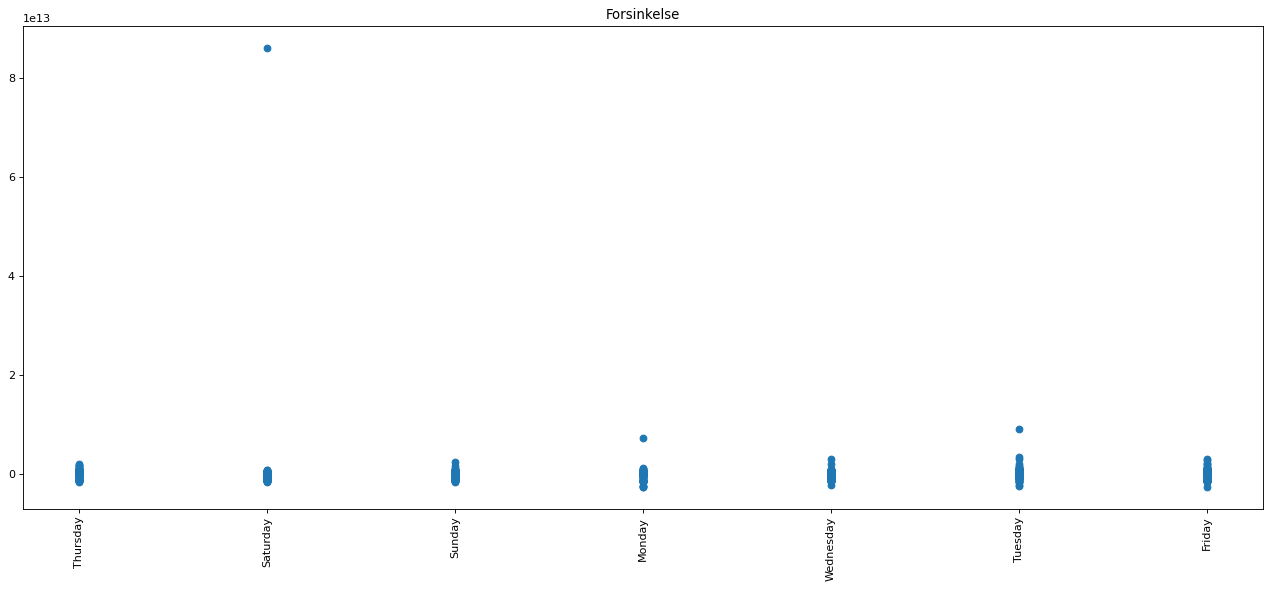

In [36]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df['Ukedag'], df['Forsinkelse'], 'o')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='vertical')
plot.title('Forsinkelse')

In [37]:
lower_limit, upper_limit = df.Forsinkelse.quantile([0.025,0.975])
lower_limit, upper_limit

(Timedelta('-1 days +23:53:01.700000'), Timedelta('0 days 00:09:14.600000'))

In [38]:
df.shape

(5949, 20)

In [39]:
df2 = df[(df.Forsinkelse>lower_limit)&(df.Forsinkelse<upper_limit)]
df2.shape

(5651, 20)

Text(0.5, 1.0, 'Forsinkelse')

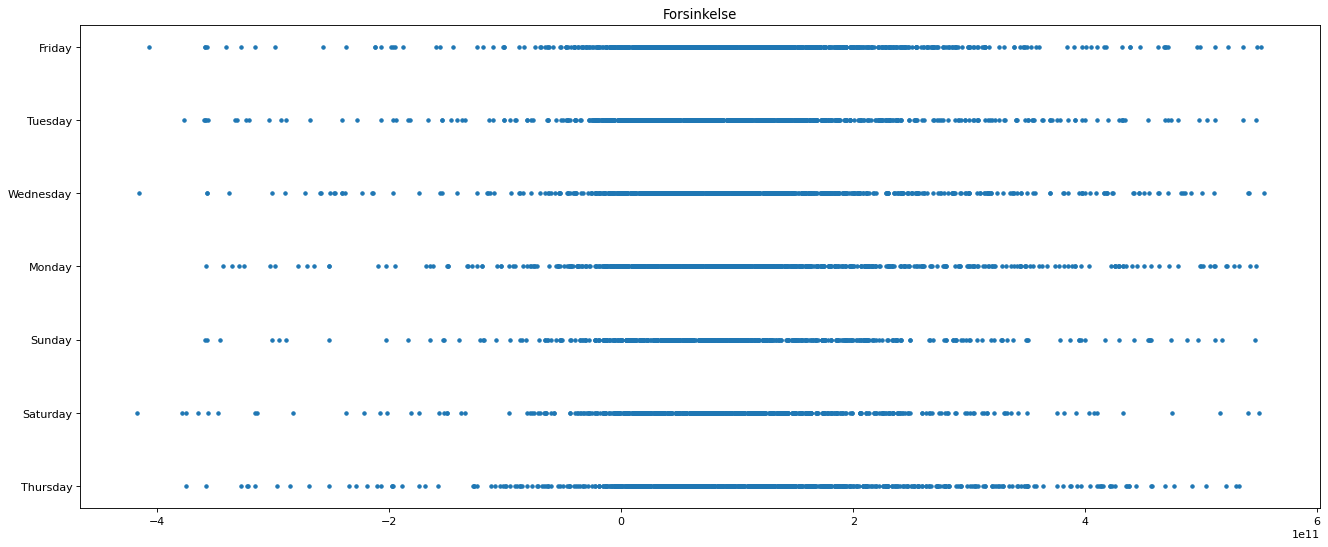

In [40]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df2['Forsinkelse'], df2['Ukedag'], '.')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='horizontal')
plot.title('Forsinkelse')

FEATURE ENGINEERING: Delay per weekday


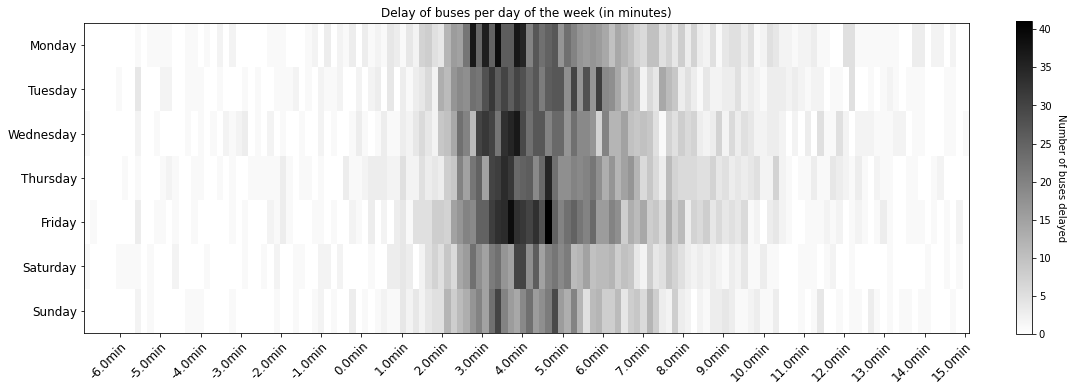

In [44]:
print("FEATURE ENGINEERING: Delay per weekday")
#This section is heavily based on matplotlib's documentation
    #https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
    #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html#matplotlib.pyplot.tick_params
    #https://matplotlib.org/3.1.1/api/colorbar_api.html#matplotlib.colorbar.Colorbar
def countDelays(rowNameY, rowNameX):
    
    minDelay = df2[rowNameX].min().total_seconds()
    maxDelay = df2[rowNameX].max().total_seconds() - minDelay
    bins = 140
    grid = np.zeros((7, bins))
    
    
    
    #Calculate minimum and maximum minute values (min/max ticks)
    i=0
    minMin, detractSec = divmod(minDelay, 60)
    if minMin<0:
        minMin = minMin+1
        detractSec = 60-detractSec
    
    maxMin, maxRest = divmod(maxDelay, 60)
    if maxMin<0:
        maxMin = maxMin+1
        maxRest = 60-maxRest
    
    #Calculate number of ticks and add corresponding label
    nrTicks = int(maxMin - minMin)
    ticks = [None] * nrTicks
    
    while i<nrTicks:
        ticks[i] = str(minMin + i)+"min"
        i = i+1
        
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    
    #Populate grid array
    for j, row in df2.iterrows():
        day = row[rowNameY]
        delay = row[rowNameX].total_seconds() - minDelay
        toBin = math.floor(delay/maxDelay*(bins-1))
        
        dayNr=-1
        
        k=0
        while k<7:
            if day==days[k]:
                dayNr=k
            k=k+1
        
        if(dayNr != -1):
            grid[dayNr, toBin] = grid[dayNr, toBin] + 1
    
    #Define heatmap
    fig, ax = plot.subplots(figsize=(15, 15))
    im = ax.imshow(grid, cmap='gist_yarg')
    ax.set_aspect(7)

    #Setting up ticks
    ax.set_xticks(np.arange(len(ticks)))
    plot.xticks(np.arange(((detractSec/10)-(detractSec/100)), (140-((maxRest/10)-(maxRest/100))), step=(140/len(ticks))))
    ax.set_xticklabels(ticks)
    ax.set_yticks(np.arange(len(days)))
    ax.set_yticklabels(days)
    ax.tick_params(axis='both', labelsize=12)
    plot.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    #Colourbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.0165)
    cbar.ax.set_ylabel("Number of buses delayed", rotation=-90, va="bottom")
    
    #Set title and show
    ax.set_title("Delay of buses per day of the week (in minutes)")
    fig.tight_layout()
    plot.show()

#Call function
countDelays('Ukedag', 'Forsinkelse')

In [45]:
df = df.sort_values('Dato', ascending=True)

## FEATURE ENGINEERING 1: Average passengers per område

FEATURE ENGINEERING: Average time at the stop per område


Text(0, 0.5, 'Count')

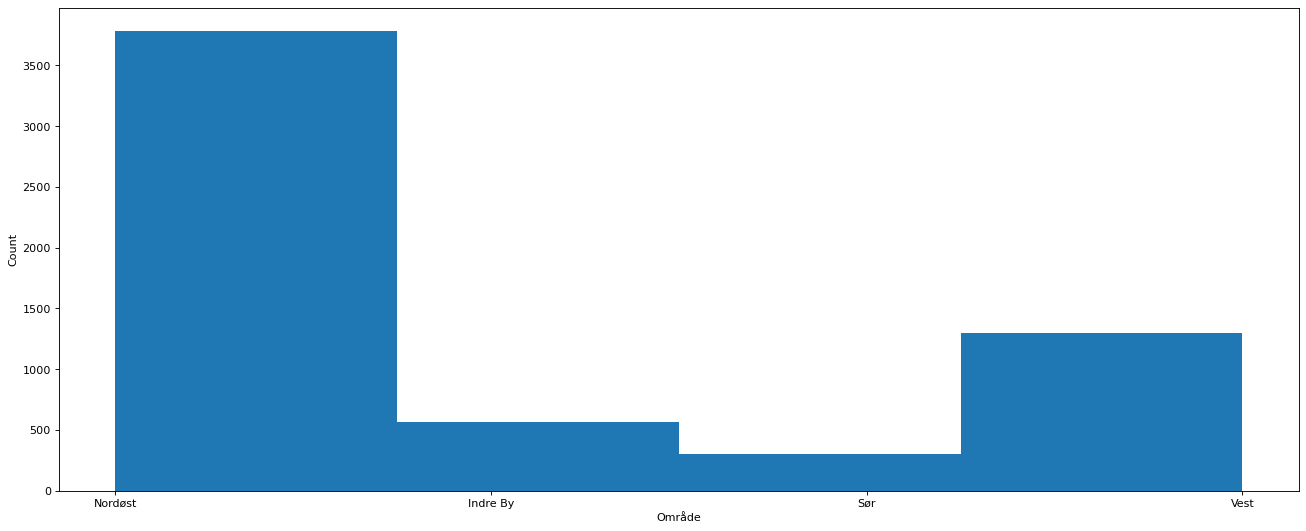

In [47]:
print("FEATURE ENGINEERING: Average time at the stop per område")
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plot
plot.hist(df.Område, bins=4, rwidth=1)
plot.xlabel('Område')
plot.ylabel('Count')

## FEATURE ENGINEERING 3: Average time at the stop per område

In [48]:
print("FEATURE ENGINEERING: Average time at the stop per område")
x = "Time_At_Stop"                                                                 #The col that will be converted
df = df.sort_values('Dato', ascending=True)
df['Time_At_Stop_Float'] = df.apply(lambda row: row[x].total_seconds(), axis = 1)  #Converting datetime to float
timePrStopArea=df[['Område', 'Time_At_Stop_Float']].groupby(['Område']).mean()     #Grouping by area and taking the mean of stop time
timePrStopWeekday=df[['Ukedag', 'Time_At_Stop_Float']].groupby(['Ukedag']).mean()  #Grouping by weekday and taking the mean of stop time

df.head()

FEATURE ENGINEERING: Average time at the stop per område


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse,Time_At_Stop_Float
5093,12009-2020-06-01T14:28:00+02:00,2020-01-06,Oslo,Nordøst,Stovner,Øvre Fossum (mot Stovner T),Stovner T (i Fossumveien),Lokal,Viken,120,...,14:53:21,14:53:55,14:52:00,14:52:00,72,7,0 days 00:00:34,Monday,0 days 00:01:21,34.0
3700,6005-2020-06-01T21:56:00+02:00,2020-01-06,Oslo,Nordøst,Bjerke,Øvre Risløkka (mot Kroklia),Kroklia (mot Oreliveien),Lokal,Oslo,60,...,22:03:41,22:04:03,22:01:00,22:01:00,33,7,0 days 00:00:22,Monday,0 days 00:02:41,22.0
4288,12006-2020-06-01T15:28:00+02:00,2020-01-06,Viken,Nordøst,Lørenskog,Lindeveien,Postterminalen øst,Lokal,Viken,120,...,15:44:45,15:44:51,15:43:00,15:43:00,72,8,0 days 00:00:06,Monday,0 days 00:01:45,6.0
976,6003-2020-06-01T13:32:00+02:00,2020-01-06,Oslo,Indre By,Sentrum,Jernbanetorget (Plf. D – ved Trafikanten),Oslo bussterminal (Plf B13),Lokal,Oslo,60,...,13:38:01,13:38:59,13:43:00,13:43:00,77,1,0 days 00:00:58,Monday,-1 days +23:55:01,58.0
2509,10011-2020-06-01T10:45:00+02:00,2020-01-06,Oslo,Nordøst,Alna,Kjelsrud (mot Furuset),IKEA Furuset (mot Furuset),Lokal,Viken,100,...,11:03:39,11:03:45,11:03:00,11:03:00,151,2,0 days 00:00:06,Monday,0 days 00:00:39,6.0


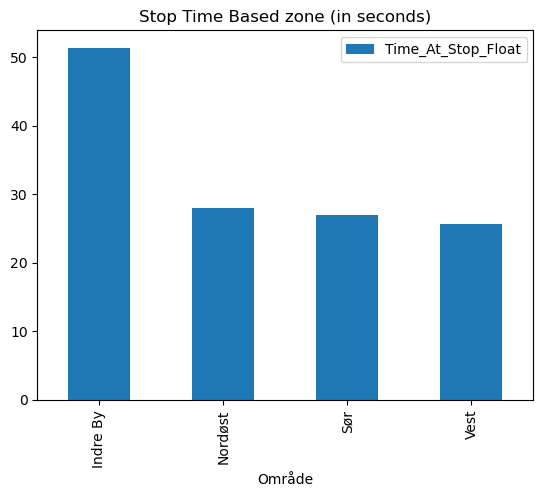

In [49]:
with plot.style.context('default'):  #Using the default plot theme

    timePrStopArea.plot.bar()                     #Barplot of the dataframe
    plot.rcParams["figure.figsize"] = [10, 8]     #Setting size
    plot.xticks(rotation='vertical')
    plot.title('Stop Time Based zone (in seconds)')            

## FEATURE ENGINEERING 2:Time at the stop per day of the week

In [50]:
print("FEATURE ENGINEERING: Average time at the stop per weekday")

L = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
timePrStopWeekday = timePrStopWeekday.reindex(L)  #reindex to get monday first
timePrStopWeekday.head()

FEATURE ENGINEERING: Average time at the stop per weekday


,Time_At_Stop_Float
Ukedag,
Monday,27.356833
Tuesday,31.511302
Wednesday,31.028986
Thursday,30.045708
Friday,26.238424


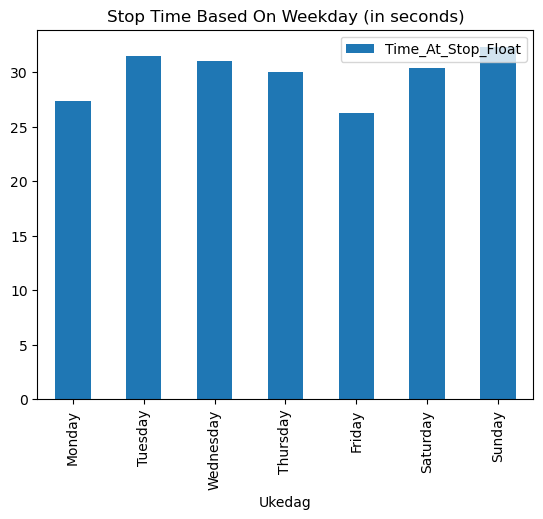

In [51]:
with plot.style.context('default'):

    timePrStopWeekday.plot.bar()
    plot.rcParams["figure.figsize"] = [10, 8]
    plot.xticks(rotation='vertical')
    plot.title('Stop Time Based On Weekday (in seconds)')

Text(0.5, 1.0, 'Stop Time Based on day of the week')

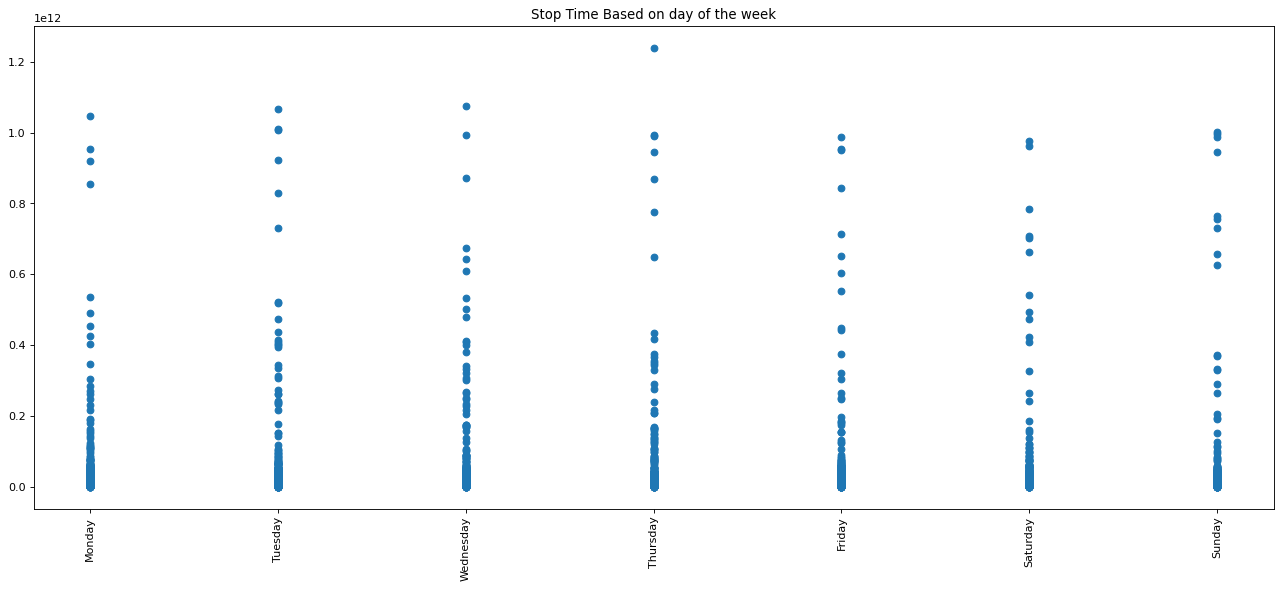

In [52]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df['Ukedag'], df['Time_At_Stop'], 'o')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='vertical')
plot.title('Stop Time Based on day of the week')

In [53]:
df[df['Time_At_Stop']==df['Time_At_Stop'].max()]
df["Time_At_Stop"].mean()

Timedelta('0 days 00:00:29.630526138')

In [ ]:
#